In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/PetAdoption_HE/train.csv")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/PetAdoption_HE/test.csv")

In [ ]:
train.shape, test.shape

((18834, 11), (8072, 9))

In [ ]:
train[train.condition.isna()].breed_category.value_counts()

2.0    1477
Name: breed_category, dtype: int64

In [ ]:
train[train.breed_category == 2.0]

In [ ]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [ ]:
train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [ ]:
test.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [ ]:
train.condition.value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [ ]:
train.breed_category.value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [ ]:
train.pet_category.value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [ ]:
pip install webcolors==1.3

  Created wheel for webcolors: filename=webcolors-1.3-cp36-none-any.whl size=13009 sha256=52de109076c737e35934ed8dfb49bfe9c7cd3665e37c8b4fc36a9ef6e134bfaa
  Stored in directory: /root/.cache/pip/wheels/f5/5c/6d/fe4a555c7072e9637a6e1bfc40a9e6736a6f567dec50c8c33b
Successfully built webcolors


In [ ]:
from webcolors import name_to_rgb
name_to_rgb('Tortie')

In [ ]:
len(train.color_type.value_counts())

56

In [ ]:
len(test.color_type.value_counts())

54

In [ ]:
test.describe()

,condition,length(m),height(cm),X1,X2
count,8072.000000,8072.000000,8072.000000,8072.000000,8072.000000
mean,0.895317,0.507265,27.451163,5.254336,4.505327
std,0.741410,0.289615,12.917903,6.505841,3.523568
min,0.000000,0.000000,5.010000,0.000000,0.000000
25%,0.000000,0.260000,16.277500,0.000000,1.000000
50%,1.000000,0.510000,27.410000,0.000000,4.000000
75%,1.000000,0.760000,38.480000,13.000000,9.000000
max,2.000000,1.000000,49.990000,18.000000,9.000000


In [ ]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [ ]:
train['size_of_animal'] = train['length(m)'] * train['height(cm)']

In [ ]:
train[train.breed_category==0.0].size_of_animal.describe()

count    9000.000000
mean       13.684629
std        10.968582
min         0.000000
25%         4.869600
50%        10.656000
75%        20.364500
max        49.780000
Name: size_of_animal, dtype: float64

In [ ]:
train.corr()

In [ ]:
len(train.groupby(['X1','X2']).count())

31

In [ ]:
len(test.groupby(['X1','X2']).count())

28

In [ ]:
train[train.breed_category==1.0]

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,size_of_animal,duration_in_shelter
5,ANSL_52200,2017-10-25 00:00:00,2019-03-10 13:18:00,0.0,Red,0.92,29.56,0,7,1.0,2,27.1952,501.554167
7,ANSL_52759,2018-06-05 00:00:00,2018-09-02 17:04:00,0.0,White,0.15,25.48,7,1,1.0,1,3.8220,89.711111
8,ANSL_74632,2015-10-10 00:00:00,2016-08-04 16:29:00,2.0,Brown,0.05,38.22,13,9,1.0,2,1.9110,299.686806
9,ANSL_56464,2014-02-18 00:00:00,2017-03-17 11:38:00,2.0,Brown,0.55,21.26,13,9,1.0,2,11.6930,1123.484722
10,ANSL_69485,2004-11-17 00:00:00,2016-12-15 13:33:00,0.0,Tricolor,0.30,23.06,0,1,1.0,2,6.9180,4411.564583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18825,ANSL_69812,2008-01-14 00:00:00,2017-04-08 19:56:00,0.0,Black,0.81,44.96,13,9,1.0,1,36.4176,3372.830556
18827,ANSL_71543,2016-08-25 00:00:00,2017-09-24 19:39:00,0.0,Tricolor,0.13,41.25,0,1,1.0,2,5.3625,395.818750
18831,ANSL_53210,2010-07-21 00:00:00,2018-08-22 14:27:00,0.0,Calico Point,0.99,28.13,13,9,1.0,1,27.8487,2954.602083
18832,ANSL_63468,2017-05-12 00:00:00,2018-02-08 14:05:00,0.0,Tan,0.55,44.82,13,9,1.0,2,24.6510,272.586806


In [ ]:
sns.countplot(x="breed_category", hue="condition", data=train)

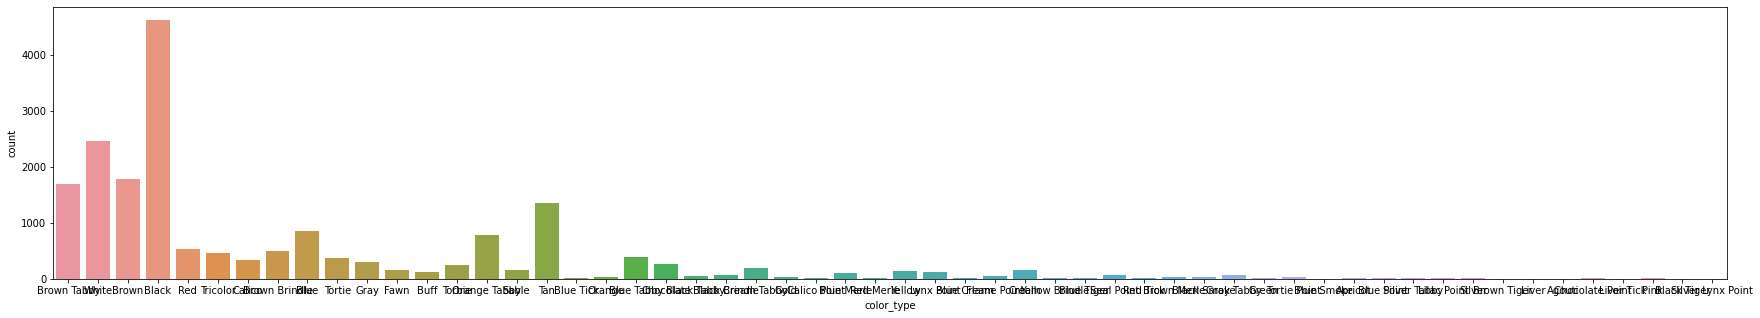

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(x="color_type", data=train)
plt.show()

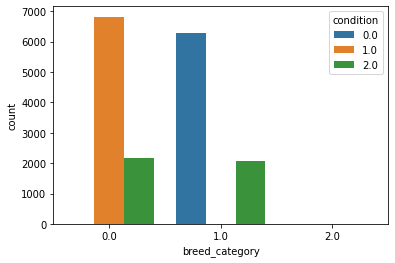

In [ ]:
sns.countplot(x="breed_category", hue="condition", data=train)

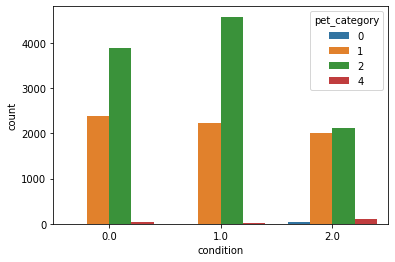

In [ ]:
sns.countplot(x="condition", hue="pet_category", data=train)

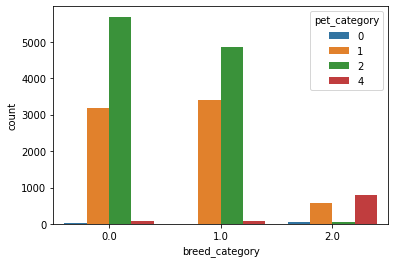

In [ ]:
sns.countplot(x="breed_category", hue="pet_category", data=train)

To give score to color based on breed_category and pet_category

In [ ]:
breed_color_df = train.groupby(['breed_category','color_type']).color_type.agg('count').to_frame('count').reset_index()

breed_color_df.loc[breed_color_df['breed_category']==0.0, 'score'] = breed_color_df.loc[breed_color_df['breed_category']==0.0, 'count'] / 2367
breed_color_df.loc[breed_color_df['breed_category']==1.0, 'score'] = breed_color_df.loc[breed_color_df['breed_category']==1.0, 'count'] / 1930
breed_color_df.loc[breed_color_df['breed_category']==2.0, 'score'] = breed_color_df.loc[breed_color_df['breed_category']==2.0, 'count'] / 432

breed_color_df = breed_color_df.drop(['count'], axis=1)
breed_color_df = breed_color_df.pivot(index='color_type', columns='breed_category')

breed_color_df.columns = breed_color_df.columns.droplevel(0)
breed_color_df.columns = ['breed_category0_score', 'breed_category1_score', 'breed_category2_score']

breed_color_df = breed_color_df.reset_index(level=0, drop=False)
breed_color_df = breed_color_df.fillna(0.0)

In [ ]:
breed_color_df

In [ ]:
pet_color_df = train.groupby(['pet_category','color_type']).color_type.agg('count').to_frame('count').reset_index()

pet_color_df.loc[pet_color_df['pet_category']==0, 'score'] = pet_color_df.loc[pet_color_df['pet_category']==0, 'count'] / 18
pet_color_df.loc[pet_color_df['pet_category']==1, 'score'] = pet_color_df.loc[pet_color_df['pet_category']==1, 'count'] / 1687
pet_color_df.loc[pet_color_df['pet_category']==2, 'score'] = pet_color_df.loc[pet_color_df['pet_category']==2, 'count'] / 2730
pet_color_df.loc[pet_color_df['pet_category']==4, 'score'] = pet_color_df.loc[pet_color_df['pet_category']==4, 'count'] / 435

pet_color_df = pet_color_df.drop(['count'], axis=1)
pet_color_df = pet_color_df.pivot(index='color_type', columns='pet_category')

pet_color_df.columns = pet_color_df.columns.droplevel(0)
pet_color_df.columns = ['pet_category0_score', 'pet_category1_score', 'pet_category2_score', 'pet_category4_score']

pet_color_df = pet_color_df.reset_index(level=0, drop=False)
pet_color_df = pet_color_df.fillna(0.0)

In [ ]:
pet_color_df.columns, breed_color_df.columns

In [ ]:
breed_color_df.shape, pet_color_df.shape

((56, 4), (56, 5))

In [ ]:
color_scores_df = pd.merge(pet_color_df, breed_color_df, on="color_type")

In [ ]:
color_scores_df

In [ ]:
pet_color_df.describe()

In [ ]:
train = train.merge(train.merge(color_scores_df, on="color_type", sort=False))
test = test.merge(test.merge(color_scores_df, on="color_type", sort=False))

In [ ]:
# train = pd.merge(train, color_scores_df, on="color_type", sort=False)
# test = pd.merge(test, color_scores_df, on="color_type", sort=False)

In [ ]:
train

In [ ]:
breed_color_dict = color_group_df.breed_category.value_counts().to_dict()

In [ ]:
breed_color_dict

{0.0: 51, 1.0: 55, 2.0: 39}

In [ ]:
new_df

In [ ]:
pet_group_df.groupby(['pet_category'])['count'].max()

pet_category
0      18
1    1687
2    2730
4     435
Name: count, dtype: int64

In [ ]:
color_group_df

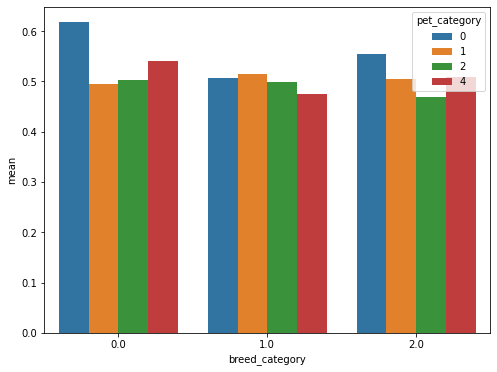

In [ ]:
temp_df = train.groupby(['breed_category','pet_category'])['length(m)'].agg('mean').to_frame('mean').reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x="breed_category", y="mean", hue="pet_category", data=temp_df)
plt.show()

In [ ]:
train.X2.value_counts()

1    8493
9    5144
7    3608
4    1263
2     183
3      64
8      58
5      12
6       5
0       4
Name: X2, dtype: int64

Imputing Values

In [ ]:
from fancyimpute import KNN
new_train = KNN(k=3).fit_transform(train[['condition']])
new_test = KNN(k=3).fit_transform(test[['condition']])

In [ ]:
new_train

In [ ]:
new_train = [item for sublist in new_train for item in sublist]
new_test = [item for sublist in new_test for item in sublist]

In [ ]:
train.isnull().sum()

pet_id                   0
issue_date               0
listing_date             0
condition                0
color_type               0
length(m)                0
height(cm)               0
X1                       0
X2                       0
breed_category           0
pet_category             0
pet_category0_score      0
pet_category1_score      0
pet_category2_score      0
pet_category4_score      0
breed_category0_score    0
breed_category1_score    0
breed_category2_score    0
dtype: int64

In [ ]:
train['condition'] = new_train
test['condition'] = new_test

In [ ]:
train.head()

In [ ]:
train['condition'] = train['condition'].fillna(3.0)
test['condition'] = test['condition'].fillna(3.0)

In [ ]:
train['condition'] = train['condition'].fillna(train['condition'].mode()[0])
test['condition'] = test['condition'].fillna(test['condition'].mode()[0])

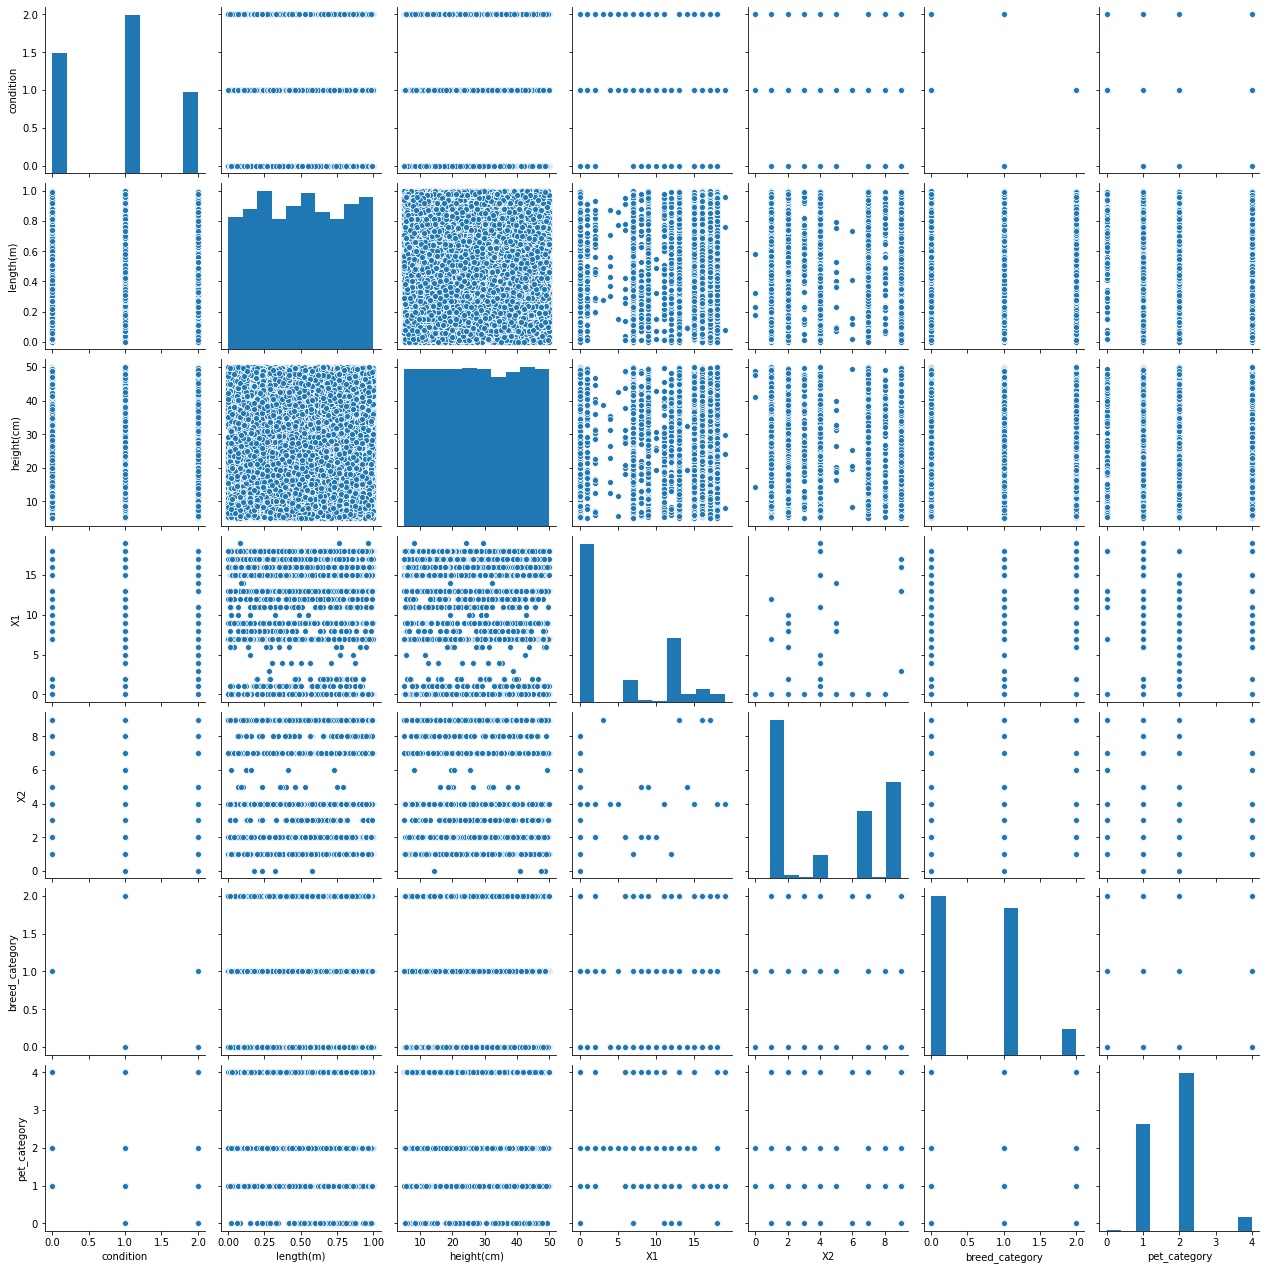

In [ ]:
sns.pairplot(train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train['height(cm)'] = scaler.fit_transform(train[['height(cm)']])
test['height(cm)'] = scaler.transform(test[['height(cm)']])

In [ ]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category,duration_in_shelter,height_length_ratio
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,1.883400e+04
mean,0.814113,0.502636,0.498863,5.369598,4.577307,0.600563,1.709143,855.917804,inf
std,0.776801,0.288705,0.289328,6.572366,3.517763,0.629883,0.717919,1096.668115,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-75.290972,0.000000e+00
25%,0.000000,0.250000,0.248278,0.000000,1.000000,0.000000,1.000000,119.779861,5.071126e-01
50%,1.000000,0.500000,0.496444,0.000000,4.000000,1.000000,2.000000,392.768056,1.006986e+00
75%,1.000000,0.760000,0.753111,13.000000,9.000000,1.000000,2.000000,1117.375000,2.024522e+00
max,2.000000,1.000000,1.000000,19.000000,9.000000,2.000000,4.000000,8056.658333,inf


In [ ]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,duration_in_shelter
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73.684028
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,1862.740972
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,1.0,Brown,0.15,40.90,15,4,2.0,4,752.350000
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,755.770833
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,52.401389


In [ ]:
train['duration_in_shelter'] = pd.to_datetime(train['listing_date']).sub(pd.to_datetime(train['issue_date']), axis=0) / np.timedelta64(1, 'D')
test['duration_in_shelter'] = pd.to_datetime(test['listing_date']).sub(pd.to_datetime(test['issue_date']), axis=0) / np.timedelta64(1, 'D')

In [ ]:
test.isnull().sum()

In [ ]:
test.head()

In [ ]:
total_df = pd.concat([train, test])

In [ ]:
total_df.shape, train.shape, test.shape

((26906, 11), (18834, 12), (8072, 10))

In [ ]:
total_df['X'] = total_df['X1'].astype(str) + total_df['X2'].astype(str) 

In [ ]:
total_df = total_df.drop(['X1','X2'], axis=1)

In [ ]:
total_df = pd.get_dummies(data=total_df, columns=['condition','color_type','X'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
total_df['duration_in_shelter'] = scaler.fit_transform(total_df[['duration_in_shelter']])

In [ ]:
total_df.describe()

,length(m),height(cm),breed_category,pet_category,pet_category0_score,pet_category1_score,pet_category2_score,pet_category4_score,breed_category0_score,breed_category1_score,breed_category2_score,duration_in_shelter,condition_0.0,condition_1.0,condition_2.0,X1_0,X1_1,X1_2,X1_3,X1_4,X1_5,X1_6,X1_7,X1_8,X1_9,X1_10,X1_11,X1_12,X1_13,X1_14,X1_15,X1_16,X1_17,X1_18,X1_19,X2_0,X2_1,X2_2,X2_3,X2_4,X2_5,X2_6,X2_7,X2_8,X2_9
count,26906.000000,26906.000000,18834.000000,18834.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000,26906.000000
mean,0.504024,27.449532,0.600563,1.709143,0.431946,0.414958,0.442973,0.241287,0.426799,0.444309,0.357262,0.100921,0.333234,0.440162,0.226604,0.572252,0.003085,0.001189,0.000037,0.000372,0.000186,0.000557,0.078458,0.002416,0.005352,0.000334,0.003085,0.003828,0.226269,0.000111,0.028804,0.031889,0.013640,0.028023,0.000111,0.000223,0.454620,0.009552,0.003754,0.065822,0.000632,0.000223,0.190292,0.003048,0.271835
std,0.288981,12.989061,0.629883,0.717919,0.390325,0.428217,0.394991,0.304895,0.360071,0.355610,0.349157,0.119051,0.471378,0.496416,0.418642,0.494761,0.055456,0.034467,0.006096,0.019275,0.013631,0.023605,0.268896,0.049092,0.072962,0.018287,0.055456,0.061755,0.418423,0.010559,0.167258,0.175707,0.115994,0.165043,0.010559,0.014932,0.497946,0.097267,0.061154,0.247975,0.025129,0.014932,0.392539,0.055122,0.444914
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,16.210000,0.000000,1.000000,0.000000,0.007113,0.009066,0.002299,0.106886,0.116580,0.037037,0.021225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,27.360000,1.000000,2.000000,0.444444,0.256669,0.488645,0.101149,0.321082,0.329534,0.192130,0.050717,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.760000,38.780000,1.000000,2.000000,0.888889,0.996443,0.702198,0.443678,0.531897,0.575648,0.747685,0.129159,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,50.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
total_df[total_df.isnull().any(axis=1)]

In [ ]:
total_df['pet_physical_size'] = total_df['length(m)'] * total_df['height(cm)']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
total_df['pet_physical_size'] = scaler.fit_transform(total_df[['pet_physical_size']])

In [ ]:
total_df['height(cm)'] = scaler.fit_transform(total_df[['height(cm)']])

In [ ]:
train_final = total_df.iloc[:18834]
test_final = total_df.iloc[18834:]

In [ ]:
train.head()

In [ ]:
train_final.head()

when score is calculated

In [ ]:
x_train_breed = train_final.drop(['color_type','breed_category','pet_category','pet_category0_score','pet_category1_score', 'pet_category2_score', 'pet_category4_score'], axis=1)
x_train_pet = train_final.drop(['color_type','breed_category','pet_category','breed_category0_score', 'breed_category1_score', 'breed_category2_score'], axis=1)
y_train_breed = train_final['breed_category']
y_train_pet = train_final['pet_category']

x_test_breed = test_final.drop(['color_type','breed_category','pet_category', 'pet_category0_score','pet_category1_score', 'pet_category2_score', 'pet_category4_score'], axis=1)
x_test_pet = test_final.drop(['color_type','breed_category','pet_category','breed_category0_score', 'breed_category1_score', 'breed_category2_score'], axis=1)

In [ ]:
x_train_breed = x_train_breed.drop(['pet_id','issue_date','listing_date'], axis=1)
x_train_pet = x_train_pet.drop(['pet_id','issue_date','listing_date'], axis=1)
x_test_breed = x_test_breed.drop(['pet_id','issue_date','listing_date'], axis=1)
x_test_pet = x_test_pet.drop(['pet_id','issue_date','listing_date'], axis=1)

with breed_category in training for pet_category

In [ ]:
x_train_breed = train_final.drop(['pet_id','issue_date','listing_date','pet_category','breed_category'], axis=1)
x_train_pet = train_final.drop(['pet_id','issue_date','listing_date','pet_category'], axis=1)
y_train_breed = train_final['breed_category']
y_train_pet = train_final['pet_category']

x_test_breed = test_final.drop(['pet_id','issue_date','listing_date','pet_category','breed_category'], axis=1)
x_test_pet = test_final.drop(['pet_id','issue_date','listing_date','pet_category'], axis=1)

In [ ]:
x_train_breed = train_final.drop(['pet_id','issue_date','listing_date','breed_category'], axis=1)
x_train_pet = train_final.drop(['pet_id','issue_date','listing_date','pet_category','breed_category'], axis=1)
y_train_breed = train_final['breed_category']
y_train_pet = train_final['pet_category']

x_test_breed = test_final.drop(['pet_id','issue_date','listing_date','breed_category'], axis=1)
x_test_pet = test_final.drop(['pet_id','issue_date','listing_date','pet_category','breed_category'], axis=1)

In [ ]:
x_train_breed.shape, y_train_breed.shape, x_test_breed.shape, x_train_pet.shape, y_train_pet.shape, x_test_pet.shape

((18834, 94), (18834,), (8072, 94), (18834, 93), (18834,), (8072, 93))

no score calculated

In [ ]:
x_train = train_final.drop(['breed_category','pet_category'], axis=1)
y_train_breed = train_final['breed_category']
y_train_pet = train_final['pet_category']
x_test = test_final.drop(['breed_category','pet_category'], axis=1)

In [ ]:
x_train = x_train.drop(['pet_id','issue_date','listing_date'], axis=1)
x_test = x_test.drop(['pet_id','issue_date','listing_date'], axis=1)

In [ ]:
x_train.shape, y_train_breed.shape, y_train_pet.shape, x_test.shape

((18834, 95), (18834,), (18834,), (8072, 95))

In [ ]:
x_test_pet.isnull().sum()

In [ ]:
x_train.describe()

In [ ]:
x_test.isnull().sum().any()

True

In [ ]:
x_test = x_test[x_train.columns]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_breed = DecisionTreeClassifier()
model_breed.fit(x_train, y_train_breed)

model_pet = DecisionTreeClassifier()
model_pet.fit(x_train, y_train_pet)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from xgboost import XGBClassifier
model_breed = XGBClassifier()
model_breed.fit(x_train, y_train_breed)

model_pet = XGBClassifier()
model_pet.fit(x_train, y_train_pet)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_breed = LogisticRegression(max_iter=10000)
model_breed.fit(x_train, y_train_breed)

model_pet = LogisticRegression(max_iter=10000)
model_pet.fit(x_train, y_train_pet)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_breed = MLPClassifier()
model_breed.fit(x_train, y_train_breed)

model_pet = MLPClassifier()
model_pet.fit(x_train, y_train_pet)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
from sklearn.svm import SVC
model_breed = SVC()
model_breed.fit(x_train, y_train_breed)

model_pet = SVC()
model_pet.fit(x_train, y_train_pet)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from lightgbm import LGBMClassifier
model_breed = LGBMClassifier()
model_breed.fit(x_train, y_train_breed)

model_pet = LGBMClassifier()
model_pet.fit(x_train, y_train_pet)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_breed = RandomForestClassifier()
model_breed.fit(x_train, y_train_breed)

model_pet = RandomForestClassifier()
model_pet.fit(x_train, y_train_pet)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
boosting_type = ['gbdt','dart','goss','rf']
learning_rate = [0.1, 0.01, 0.001]
n_estimators = [50, 100, 150, 200, 300, 500, 700]
min_child_samples = [10, 20, 30, 50]
num_leaves = [25, 31, 45, 57]
min_child_weight = [0.001, 0.01, 0.0001]

hyperparameter_grid = {
    'boosting_type' : boosting_type,
    'learning_rate' : learning_rate,
    'n_estimators' : n_estimators,
    'min_child_samples' : min_child_samples,
    'num_leaves' : num_leaves,
    'min_child_weight' : min_child_weight
}

from lightgbm import LGBMClassifier
classifier = LGBMClassifier()

from sklearn.model_selection import RandomizedSearchCV
random_cv_breed = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 2,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv_pet = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 2,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv_breed.fit(x_train, y_train_breed)
random_cv_pet.fit(x_train, y_train_pet)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  5.3min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 11.4min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 21.2min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 10.7min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 23.6min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 45.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                   

In [ ]:
n_estimators = [50, 100, 200, 300, 500]
bootstrap = [True, False]
max_depth = [5, 8, 15, 25, 30]
criterion = ['gini','entropy']
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = ['auto', 'sqrt', 'log2']

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'bootstrap' : bootstrap,
    'max_depth' : max_depth,
    'criterion' : criterion,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features
}

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

from sklearn.model_selection import RandomizedSearchCV
random_cv_breed = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 2,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv_pet = RandomizedSearchCV(estimator=classifier,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 2,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv_breed.fit(x_train, y_train_breed)
random_cv_pet.fit(x_train, y_train_pet)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   14.3s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  3.8min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 10.9min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   15.2s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  4.7min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  9.5min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 13.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
random_cv_breed.best_estimator_

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.001, max_depth=-1,
               min_child_samples=10, min_child_weight=0.0001,
               min_split_gain=0.0, n_estimators=700, n_jobs=-1, num_leaves=25,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
random_cv_pet.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=10, min_child_weight=0.01, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from lightgbm import LGBMClassifier
model_breed = LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.001, max_depth=-1,
               min_child_samples=10, min_child_weight=0.0001,
               min_split_gain=0.0, n_estimators=700, n_jobs=-1, num_leaves=19,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
model_breed.fit(x_train, y_train_breed)

model_pet = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=10, min_child_weight=0.01, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model_pet.fit(x_train, y_train_pet)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=10, min_child_weight=0.01, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_breed = DecisionTreeClassifier()
model_breed.fit(x_train_breed, y_train_breed)

model_pet = DecisionTreeClassifier()
model_pet.fit(x_train_pet, y_train_pet)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from xgboost import XGBClassifier
model_breed = XGBClassifier()
model_breed.fit(x_train_breed, y_train_breed)

model_pet = XGBClassifier()
model_pet.fit(x_train_pet, y_train_pet)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_breed = RandomForestClassifier()
model_breed.fit(x_train_breed, y_train_breed)

model_pet = RandomForestClassifier()
model_pet.fit(x_train_pet, y_train_pet)

when breed is considered for pet prediction in training

In [ ]:
y_pred_breed.tolist()

In [ ]:
len(x_train_pet['breed_category'])

18834

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_pet = RandomForestClassifier()
model_pet.fit(x_train_pet, y_train_pet)

y_pred_pet = model_pet.predict(x_test_pet)
x_test_breed['pet_category'] = y_pred_pet.tolist()

model_breed = RandomForestClassifier()
model_breed.fit(x_train_breed, y_train_breed)

y_pred_breed = model_breed.predict(x_test_breed)

In [ ]:
y_pred_breed = model_breed.predict(x_test_breed)
y_pred_pet = model_pet.predict(x_test_pet)

In [ ]:
y_pred_breed = model_breed.predict(x_test)
y_pred_pet = model_pet.predict(x_test)

In [ ]:
np.unique(y_pred_breed, return_counts=True)

(array([0., 1., 2.]), array([4237, 3216,  619]))

In [ ]:
pred_breed = pd.DataFrame(y_pred_breed)
pred_pet = pd.DataFrame(y_pred_pet)
sub_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/PetAdoption_HE/test.csv")
datasets = pd.concat([sub_df[['pet_id']], pred_breed, pred_pet], axis=1)
datasets.columns = ['pet_id','breed_category','pet_category']
datasets.to_csv('/content/my_submission37.csv', index=False)